# Kaggle, Titanic: Machine Learning from Disaster
- 有名なタイタニックの事例を勉強しようの会
- 参考資料
    - Kaggle のページ https://www.kaggle.com/c/titanic
    - [Qiita, 【Kaggle超初心者向け】Titanicにチャレンジしてみた](https://qiita.com/5sigma_AAA/items/0c23907da9330681147b)
    - [【Kaggle初心者入門編】タイタニック号で生き残るのは誰？](https://www.codexa.net/kaggle-titanic-beginner/)
        - 深く考えずにコピペで動かしていたらエラーを吐いた
        - 決定木でやっているから基本は上と同じ
        - 最後に 7 変数を使って検証している点が違う
        - 変数変えればいいだけなのでいったん無視
    - [KaggleチュートリアルTitanicで上位3%以内に入るには。(0.82297)](https://lp-tech.net/articles/0QUUd)
- 眺めてみたい Notebook
    - スタッキングの事例 https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
    - 基本 https://www.kaggle.com/startupsci/titanic-data-science-solutions
        - 分析・前処理・特徴量追加が丁寧に書いてあってかなりよいっぽい
- メモ
    - データ件数が 1000 件もなく計算は軽めだからいろいろ試せる

## 今日の予定
- まず日本語ページの記述をもとに雑に全体を流す
- [この notebook](https://www.kaggle.com/startupsci/titanic-data-science-solutions)で事前の分析や前処理をもう少し詳しく見る
    - 大事な部分を抜き出したり（話しやすいように）日本語にまとめ直す時間は取れず無念

## Qiita, 【Kaggle超初心者向け】Titanicにチャレンジしてみた
- URL https://qiita.com/5sigma_AAA/items/0c23907da9330681147b

### データセットダウンロード
- - <https://www.kaggle.com/c/titanic/data> からデータを取ってくる

### データの確認
- データの前処理と可視化のためのライブラリをインポート
- CSVファイルを読み込む

In [0]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv')

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### ざっくりとデータの全体像を把握
| 英語        | 日本語                                    |
|-------------|-------------------------------------------|
| PassengerId | 乗客識別ユニークID                        |
| Survived    | 生存フラグ（0=死亡、1=生存）              |
| Pclass      | チケットクラス                            |
| Name        | 乗客の名前                                |
| Sex         | 性別（male=男性、female＝女性）           |
| Age         | 年齢                                      |
| SibSp       | タイタニックに同乗している兄弟/配偶者の数 |
| parch       | タイタニックに同乗している親/子供の数     |
| ticket      | チケット番号                              |
| fare        | 料金                                      |
| cabin       | 客室番号                                  |
| Embarked    | 出港地（タイタニックへ乗った港）          |

##### pclass = チケットクラス
| 値 | 意味                   |
|----|------------------------|
|  1 | 上層クラス（お金持ち） |
|  2 | 中級クラス（一般階級） |
|  3 | 下層クラス（労働階級） |

##### Embarked = 出港地

| 値 | 意味        |
|----|-------------|
| C  | Cherbourg   |
| Q  | Queenstown  |
| S  | Southampton |

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 基本的な統計量の確認

In [0]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### ヒストグラムを作成

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6ea6c64a8>,
      dtype=object)

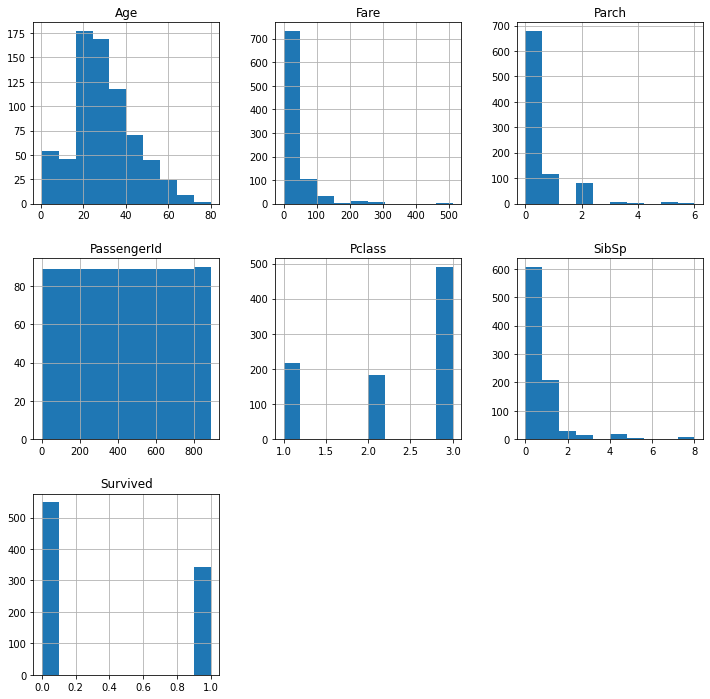

In [0]:
df.hist(figsize = (12,12))

### 非数値カテゴリ変数のヒストグラムも見たい

<function matplotlib.pyplot.show>

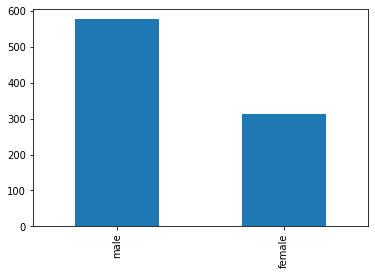

In [0]:
df["Sex"].value_counts().plot(kind="bar")
plt.show

<function matplotlib.pyplot.show>

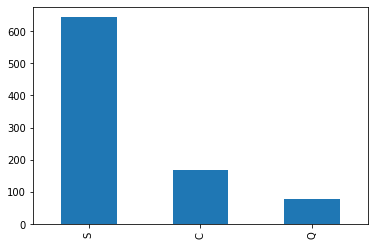

In [0]:
df["Embarked"].value_counts().plot(kind="bar")
plt.show

#### 各項目の相関関係を可視化

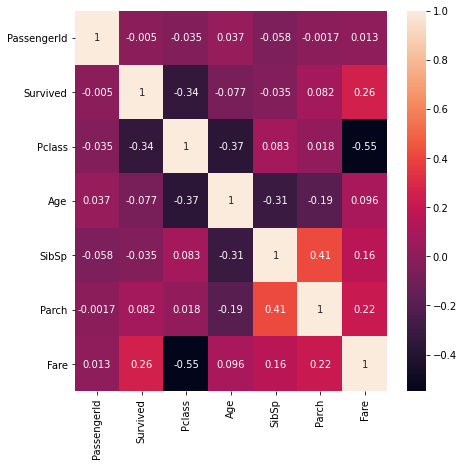

In [0]:
plt.figure(figsize = (7,7))
sns.heatmap(df.corr(), annot = True)

#### 試しに性別と目的変数の関係を可視化
- 女性の生存率は男性に比べると高い

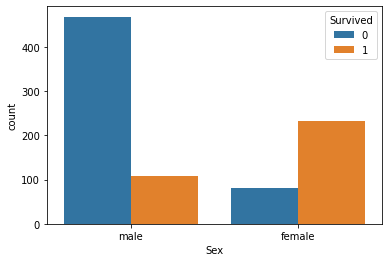

In [0]:
sns.countplot('Sex', hue = 'Survived', data = df)

### 年齢でどうなるかも見てみたい
- 男女＋年齢で細分類したときにどうなるだろう
    - コードの書き方が分からず断念

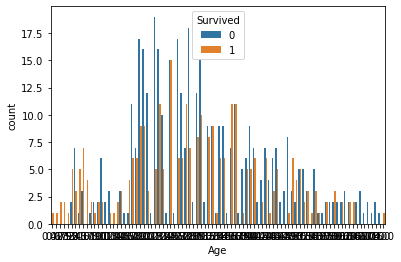

In [0]:
sns.countplot('Age', hue = 'Survived', data = df)

### データの前処理

#### 欠損値処理とカテゴリ変数の置換

In [0]:
#各列ごとに欠損値を一つでも含むか確認
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 前処理を進める
- 以下の処理をした後にデータを分ける
- 順にやっていく

##### 欠損値
- Fare（料金）・Age・Embarked（出港地）をメジアンで埋める

##### カテゴリ変数の変換
- Sex：男性を 1、それ以外を 0
    - 最近のアレなアレで男性以外の性もいろいろありうるがここでは無視
- Embarked（出港地）：S=0, C=1, Q=2

##### 不要な列を削除
- Cabin（客室番号）、Name、PassengerId、Ticket を削除

In [0]:
from sklearn.model_selection import train_test_split

#欠損値処理
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')

#カテゴリ変数の変換
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df['Embarked'] = df['Embarked'].map( {'S': 0 , 'C':1 , 'Q':2}).astype(int)

#不要なcolumnを削除
df = df.drop(['Cabin','Name','PassengerId','Ticket'],axis =1)

#学習データとテストデータに分割
train_X = df.drop('Survived',axis = 1)
train_y = df.Survived
(train_X , test_X , train_y , test_y) = train_test_split(train_X, train_y,
                                                         test_size = 0.3,
                                                         random_state = 0)

### 機械学習の実装
- 決定木とランダムフォレストで予測してみる

#### 決定木
- [ROC 曲線](https://ja.wikipedia.org/wiki/%E5%8F%97%E4%BF%A1%E8%80%85%E6%93%8D%E4%BD%9C%E7%89%B9%E6%80%A7)
    - 受信者操作特性（Receiver Operating Characteristic, ROC）
    - AUC: Area Under the ROC Curve

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 0)
clf = clf.fit(train_X , train_y)
pred = clf.predict(test_X)

#正解率の算出
from sklearn.metrics import (roc_curve, auc, accuracy_score)
pred = clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, pred,pos_label = 1)
auc(fpr,tpr)
accuracy_score(pred,test_y)

0.7798507462686567

#### ランダムフォレスト

In [0]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 10,max_depth=5,random_state = 0)
clf = clf.fit(train_X , train_y)
pred = clf.predict(test_X)
fpr, tpr , thresholds = roc_curve(test_y,pred,pos_label = 1)
auc(fpr,tpr)
accuracy_score(pred,test_y)

0.8283582089552238

### 予測結果の提出

In [0]:
fin = pd.read_csv('test.csv')
fin.head()

passsengerid = fin['PassengerId']
fin.isnull().sum()
fin['Fare'] = fin['Fare'].fillna(fin['Fare'].median())
fin['Age'] = fin['Age'].fillna(fin['Age'].median())
fin['Embarked'] = fin['Embarked'].fillna('S')

#カテゴリ変数の変換
fin['Sex'] = fin['Sex'].apply(lambda x: 1 if x == 'male' else 0)
fin['Embarked'] = fin['Embarked'].map( {'S': 0 , 'C':1 , 'Q':2}).astype(int)

#不要なcolumnを削除
fin= fin.drop(['Cabin','Name','Ticket','PassengerId'],axis =1)

#ランダムフォレストで予測
predictions = clf.predict(fin)

submission = pd.DataFrame({'PassengerId':passsengerid, 'Survived':predictions})
submission.to_csv('submission.csv' , index = False)

### Qiita 編終了

## 事前分析・前処理を詳しく
- [この notebook](https://www.kaggle.com/startupsci/titanic-data-science-solutions)で事前の分析や前処理をもう少し詳しく見る

### はじめに
- Kaggle などのデータサイエンスコンペに対する典型的なワークフローを確認する
- よいエントリーはいろいろあるが、それらは専門家が専門家のために作られた notebook でいくつかの説明が省略されている。素人には厳しい面がある。
- そこでゆっくり解説したい。

### Workflow stages
- コンペのワークフローは次の 7 ステップある
    1. 問題の定義
    1. 学習データ・テストデータの取得
    1. データを眺め、調整し、きれいにする
    1. 分析し、パターンを同定し、データを調べつくす
    1. モデル化し、予測し、問題を解く
    1. 可視化し、レポートを作り、問題を解く過程と最終結論をまとめる
    1. 結果を提出する
- もちろん状況によって多少ワークフローは変わるし、各ステップの中でも上記ワークフローを回すこともある
    - 例えば可視化は何度もやるべきだろう

### 問題の定義（Question and problem definition）
- タイタニック号の問題は次の通り

> タイタニックの事故で生き残った人と亡くなった人がいる。生存情報が除かれたテストデータセットに基づいて、テストデータセットにある乗客が生き残ったかどうかを判定するモデルを考える。

- Kaggle のページにはいくつかの基本情報が書いてある
    - 2224 人の乗客・乗員のうち、1502 名がなくなった。生存率は 32% である。
    - 多くの乗客がなくなった理由の 1 つに救命ボート不足がある
    - 運の要素もあっただろうが、女性・子供・上流階級（upper-class）のような属性を持つ人々が生き残った可能性は高い

#### 目的（Workflow goals）

#### 学習データ・テストデータの取得
- ワークフローでは主な目的が 7 つある。
    1. 分類：サンプルを分類・カテゴリ化する。異なるクラスの相関や implication（どう訳す？）も理解したい。
    1. 相関：学習データに与えられた特徴量に基づいて問題に取り組む。どの特徴量が目的に特に貢献しているか？特徴量と目的に相関はあるか？特徴量は新たに作ったり補完することもできる
    1. Converting（変換？）：モデル化する段階でデータを準備する。モデルアルゴリズムによっては全ての特徴量を等価な数値に変換する必要がある。（例えば文字列で表されたカテゴリ変数がそう。）
    1. Completing（補完？）：欠損値を埋める。モデルによっては欠損値がない方がよい場合もある。
    1. 修正：学習データのエラーや不正確な値を分析して、値を修正したりエラーを含むサンプルを除く必要がある。例えば外れ値は除く。分析に寄与しない、または結果を強くゆがめる特徴量については完全に捨てる必要もあるだろう。
    1. Creating（追加？）：すでにある特徴量に基づいて新たに特徴量を作れないか考えてみる。
    1. Charting（可視化？）：適切な可視化を検討する。

#### ライブラリの読み込み

In [0]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### データを得る（Acquire data）
- pandas を使うと便利
- 学習データと訓練データを pandas の DataFrame にする
- これらのデータセットを結合して、ある種の操作は両方に一気にあてることにする

In [0]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

### データを分析する（Analyze by descring data）
- データセットにはどんな特徴量があるか？
- 特徴量の名前は Kaggle のデータページにも載っている。

In [0]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


#### どの特徴量がカテゴリ変数か？
- nominal, ordinal, ratio, interval based?
    - 名義尺度、順序尺度、間隔尺度、比例尺度
    - 参考：https://bellcurve.jp/statistics/course/1562.html
- どの種類かによって適切な可視化、プロットの仕方が変わる
- ここでは次の通り
    - Categorical: Survived, Sex, and Embarked.
    - Ordinal: Pclass.

#### どの特徴量が数値変数か？
- discrete, continuous,timeseries based?
- これも適切なプロットの仕方に影響する
- ここでは次の通り
    - Continous: Age, Fare
    - Discrete: SibSp, Parch.
        - SibSp = Siblings and Spouses：兄弟姉妹と配偶者
        - Parch = Parent and children：親子

#### とりあえずデータを少し見てみる

In [0]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### どの特徴量が混合データ型か？
- チケットが数値と英数字。
- 客室情報は英数字。

#### エラーやタイポがある特徴量はどれか？
- データセットが大きいと調べること自体が非常に大変
- 名前はエラーやタイポがある
    - 敬称があり、括弧つきがあり、短縮形などに対してクオーテーションがある。
    - 次のコードの実行例を見るとわかる

In [0]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### 空白・null・空（blank, null, or empty）を含む特徴量はどれか
- 学習データ：客室・年齢・出港地には欠損値がある
- テストデータ：客室・年齢が不完全

#### 各種特徴量のデータ型は何か？
- 7 つの特徴量が整数または float。
    - テストデータでは 6 つ。
- 5 つの特徴量が文字列（object）

In [0]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

#### サンプルの数値変数の分布はどうなっているか
- 分析初期にデータの感覚をつかむうえでとても重要
- 学習データは実際の乗員・乗客数 2224 名の約 4 割で、891 名分のデータがある
- 「Survived」は 0-1 でカテゴリ変数
- などなど

In [0]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### カテゴリ変数の分布はどうか
- データセットで名前は一意的
- 客室には重複があり、同じ部屋を共有していた乗客がいる。
- 出港地は 3 つだけ。

In [0]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hoyt, Mr. Frederick Maxfield",male,1601,B96 B98,S
freq,1,577,7,4,644


### データ分析に基づく仮定
- ここまでの状況を見て次のように仮定する
- 適切な行動をとる前にさらに仮定を検証することもある

#### 修正
- どの特徴量が「生存」とどのくらい相関があるか知りたい
- プロジェクトの最初の段階でやりたい
- プロジェクトの後半では素早く修正してモデルの修正とマッチさせたい

#### 補完（Completing）
- 年齢を補完して「生存」と相関するようにしたい
- 出港地を補完して「生存」または重要な特徴量と相関するようにしたい

#### 修正
- チケット：重複が多い（22%）。「生存」と相関もなさそうなので分析からは落とした方がよさそう
- 客室：学習データ・テストデータともに欠損が多いか null 値を多く含むので落とした方がよさそう
- 乗客ID：「生存」に寄与しないので学習データから落としたい
- 名前：敬称を含んだり省略名を含んだり、非標準的なデータが多い。直接的には「生存」に寄与しなさそうだし、落としてもいいかもしれない。

#### 生成（Creating）
- 親子・きょうだい・配偶者（Parch, Sibsp）をまとめて Family を作ってみるか？
- 名前から敬称（Title）を抽出して新たな特徴量を作りたい
- 年齢の代わりに年齢層という特徴量を作る。連続変数を順序カテゴリ変数に変える
- 運賃のレンジを作るのも分析に役立つかもしれない

#### 分類
- 以前注意した問題の記述に基づいて仮定を追加する
- 女性（Sex=female）はより多く生存したのではないか
- 年少者はより多く生存したのではないか
    - 具体的に何歳以下か？
- 上流階級はより多く生存したのではないか

### 重要な特徴量で分析する
- Pclass（チケット種別）：Pclass=1と「生存」は相関が 0.5 より大きい。これはモデルに取り込む
- Sex：Sex=female は 74% と高い生存率を示すことを確認している（のでこれは取り込む）
- Sibsp・Parch（きょうだい・配偶者・親子）：ある値とは全く相関がない：以下の分析結果を参照すること。
    - これらの個々の特徴量から特徴量または特徴量の集合が作れる

#### Pclass-Survived

In [0]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'],
                                         as_index=False).mean().sort_values(by='Survived',
                                                                            ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


#### Sex-Survived

In [0]:
train_df[["Sex", "Survived"]].groupby(['Sex'],
                                      as_index=False).mean().sort_values(by='Survived',
                                                                         ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


#### Sibsp-Survived

In [0]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'],
                                        as_index=False).mean().sort_values(by='Survived',
                                                                           ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


#### Parch-Survived

In [0]:
train_df[["Parch", "Survived"]].groupby(['Parch'],
                                        as_index=False).mean().sort_values(by='Survived',
                                                                           ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### データを可視化して分析する
- https://www.kaggle.com/startupsci/titanic-data-science-solutions#Analyze-by-visualizing-data

#### 年齢と Survival の相関
- 年齢のような連続変数を見るときはヒストグラムも便利

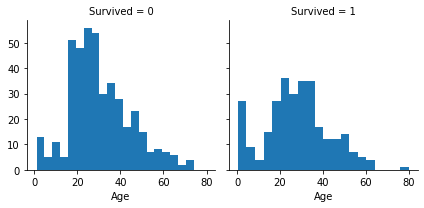

In [0]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

##### 観察
- 4歳以下は生存率が高い
- 一番の老人（80歳）は生きている
- 15-25 歳の大半は生き残っていない
- 乗客の大半は 15-35 歳


##### 判断
- モデルに年齢を取り込む
- 年齢の欠損を埋める
- 年齢はそのままではなく年齢層で考える

#### Pclass と Survival の相関

##### 観察
- ここでは特に Pclass（チケットのクラス）と Survived を見る
- Pclass=3：一番乗客がいるが生存も少ない
- Pclass=2,3 の幼児がほぼ生き残っている
- Pclass=1 の乗客はほぼ生き残っている
- Pclass は乗客の年齢分布の観点から変わる

##### 判断
- Pclass はモデルの学習に使う

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


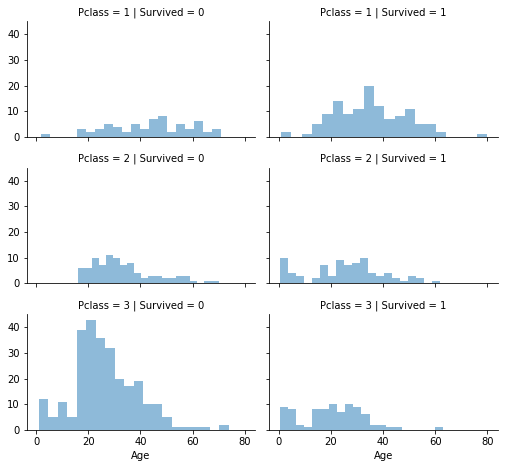

In [0]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

#### 出港地と Survival の相関

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


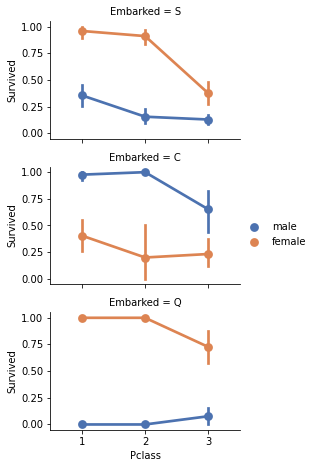

In [0]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

##### 観察
- 女性は男性よりも生存している
- `Embarked=C` では男性の方が生存率が高く、例外的。これは Pclass と Embarked の相関であろう。
- `Pclass=3` は `Pclass=2 for C and Q` と比べて生存率が高くあるはず。
- `Pclass=3` と男性乗客の生存率の関係

##### 判断
- 性別は学習モデルに取り込む
- 出港地は欠損を埋めたうえでモデルに取り込む

#### 出港地・性・運賃と Survival の相関

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


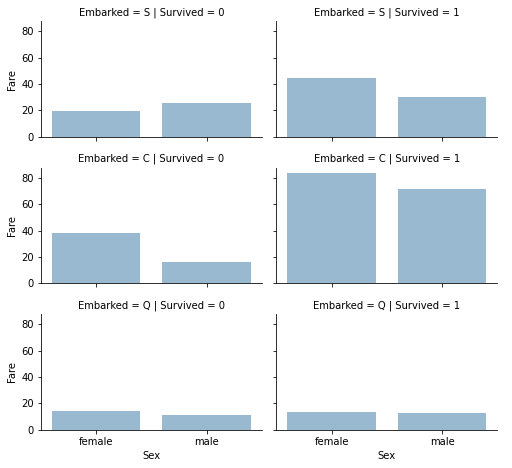

In [0]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

##### 観察
- 高い運賃を払った乗客は生き残っているはず
- 出港地と生存率は相関している

##### 判断
- 運賃を等級付けして調べてみよう

### データと戦う（Wrangle data）
- https://www.kaggle.com/startupsci/titanic-data-science-solutions#Wrangle-data
- （この wrangle、何が適訳だろうか？）
- ここからはデータを修正・補完したり、特徴量を作ったりする

#### 特徴量を落とす
- 計算量を減らして分析スピードをあげるため、落とすものは早めに落とす
- Cabin と Ticket は落とす
- **学習データ・テストデータの両方から落とすこと** 

In [0]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

#### 既存のデータから新しい特徴量を作る

#### 敬称と Survival
- 名前から敬称を取り出して敬称と Survival の相関を見る
- 正規表現で敬称を取り出す：名前のところでドット（.）で終わる最初の文字を取り出す

In [0]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


##### 観察
- 敬称・年齢・Survival をプロットすると次のことが分かる
- ほとんどの敬称と年齢層の関係
    - 「Master title has Age mean of 5 years.」これ、何と訳すといい？
- Survival among Title Age bands varies slightly.
- Mme・Lady・Sir などはほぼ生存しているが、Don・Rev・Jonkheer はそうではない

##### 判断
- 特徴量として敬称をモデル学習に取り込む

##### データ修正
- いくつかの敬称を `Rare` に変換する
- 敬称を標準化する：Mlle を Miss に、Ms を Miss に、Mme を Mrs に

In [0]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


##### 順序変数化

In [0]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


##### 名前と乗客 ID を落とす
- テストデータからも落とすこと
- 再読み込みが面倒になので、データが少なければ落としたデータを逐次 CSV などに落としておくのも一手
    - あとで落としすぎたか？と思ったときに適当なところから分析を巻き戻しやすくもなる（はず）

In [0]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

#### カテゴリ変数の変換

##### 性別

In [0]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


#### 連続的な数値変数の補完

##### 年齢
- 補完には 3 つの方法が考えられる
    - シンプルに平均と標準偏差からランダムに生成する
    - 他の相関がある特徴量を使って推測する
    - 上記2つを組み合わせる。メジアンに基づいた年齢を推測するよりも、Pclass・Gender の組み合わせに基づいた平均と標準偏差を使う。
- 上記の 1・3 はモデルにランダムなノイズが入る
- ここでは 2 を使う

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


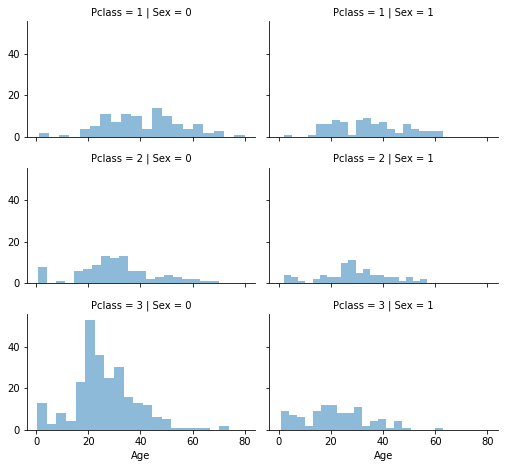

In [0]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

###### 調整開始

In [0]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

###### 補完のために組み合わせてイテレーション

In [0]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


###### 年齢帯を作って Survived との相関を決める

In [0]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'],
                                          as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


###### 年齢と年齢帯に変換

In [0]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


###### （よくわからない）
- 「We can not remove the AgeBand feature.」と書きつつ drop している？

In [0]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


##### きょうだい・配偶者・親子をまとめて FamilySize にする

###### まずはまとめる

In [0]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


###### `IsAlone` を追加

In [0]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


###### 親子・きょうだい・配偶者・FamilySize を落として IsAlone に集約

In [0]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


##### Pclass * Age という新たな量を生成

In [0]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


#### カテゴリ変数の補完

##### 出港地の欠損を `S` に変換

In [0]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [0]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


#### カテゴリ変数を数値化

##### 出港地の数値化

In [0]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


##### 運賃（Fare）の処理

In [0]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


##### （よくわからない）
- 「We can not create FareBand.」はどういうこと？

In [0]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


##### `FareBand` に基づいて順序変数化

In [0]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [0]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


### モデル化・予測・解答
- 問題の型を理解し、適切なモデルを選ばなければならない
- 教師つき学習を使う
- 分類や回帰も必要か？
- 対象になるモデルは例えば次の通り
    - Logistic Regression
    - KNN or k-Nearest Neighbors
    - Support Vector Machines
    - Naive Bayes classifier
    - Decision Tree
    - Random Forrest
    - Perceptron
    - Artificial neural network
    - RVM or Relevance Vector Machine

In [0]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

#### Logistic Regression

In [0]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

##### 決定関数の係数を決める
- いくつか見るところがある：とりあえず元記事参照（時間があれば後で埋める）

In [0]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


#### SVM
- Logistic Regression よりスコアが高い

In [0]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

#### kNN

In [0]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

#### Gaussian Naive Bayes

In [0]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

#### パーセプトロン

In [0]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

#### Linear SVC

In [0]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.12

#### Stochastic Gradient Descent

In [0]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.34

#### Decision Tree

In [0]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

#### Random Forest

In [0]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

#### モデルの評価
- 次のコードセル・結果参照
- 決定木とランダムフォレストの結果が同じ
    - ランダムフォレストを選ぶ
    - 決定木は学習データに過適合しがちなため

In [0]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
2,Logistic Regression,80.36
7,Linear SVC,79.12
5,Perceptron,78.34
6,Stochastic Gradient Decent,78.34
0,Support Vector Machines,78.23
4,Naive Bayes,72.28


### 結果を提出する

In [0]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)